# chepter08 연습문제 과제

In [74]:
# import Lib
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import nbimporter 
from chap08_module import *

## Problem 2

In [75]:
#설계 사양
wp=0.3*np.pi; ws=0.4*np.pi; Rp=0.25; As=50 

### (1) 설계방정식에 따라 필터들이 차수 N 계산

: N 계산식은 과제 문서 파일 참고 

### (2) 각 함수들을 사용하여 각 아날로그 프로토타입 필터들의 차수 N 계산

#### 버터워스

In [76]:
N,wc=signal.buttord(wp,ws,Rp,As,analog=True)
print("필터차수 N=",N)

필터차수 N= 25


#### 체비세프-1

In [77]:
# 체비세프-1
N,wc=signal.cheb1ord(wp,ws,Rp,As,analog="true")   
print("필터차수 N=",N)

필터차수 N= 10


#### 체비세프-2

In [78]:
# 체비세프 -2
N,wc=signal.cheb2ord(wp,ws,Rp,As,analog="true")   #필터차수, 정규화 차단주파수
print("필터차수 N=",N)

필터차수 N= 10


#### 엘립틱

In [79]:
# 엘립틱
N,wc=signal.ellipord(wp,ws,Rp,As,analog="true")   #필터차수, 정규화 차단주파수
print("필터차수 N=",N)

필터차수 N= 6


## Problem 9

In [80]:
# 설계 사양
Omegap=0.45*np.pi    #디지털 통과대역 에지주파수 [rad]
Omegas=0.5*np.pi     #디지털 저지대역 에지주파수 [rad]
Rp=0.5; As=60        #통과대역 리플과 저지대역 감쇄 [dB]

T=1; Fs=1/T     #샘플구간과 샘플주파수
wp=2/T*np.tan(Omegap/2); print("wp=",wp) #아날로그 통과대역 에지주파수 사전 와핑
ws=2/T*np.tan(Omegas/2); print("ws=",ws) #아날로그 저지대역 에지주파수 사전 와핑

wp= 1.7081613709269332
ws= 1.9999999999999998


### 버터워스

#### (1) 아날로그 필터 설계

In [81]:
# 버터워스 아날로그 필터 설계
print("\n","============= Filter order, Cutoff frequency ===================")
N,wc=signal.buttord(wp,ws,Rp,As,analog=True)   #필터차수, 차단주파수
print("Filter order N=",N)
print("Cutoff frequency, wc=",wc,"=",wc/np.pi,"*pi")
print("\n","============= Analog Filter ====================================")
c,d=signal.butter(N,wc,"low",analog=True)   #아날로그 시스템함수 분모/분자계수
print("Numerator coefficients=",c); print("Denomunator coefficients=",d)


 ============= Filter order, Cutoff frequency ===================
Filter order N= 51
Cutoff frequency, wc= 1.7437551725619544 = 0.555054510510592 *pi

 ============= Analog Filter ====================================
Numerator coefficients= [2.0690022e+12]
Denomunator coefficients= [1.00000000e+00 5.66245123e+01 1.60316770e+03 3.02403747e+04
 4.27273134e+05 4.82042237e+06 4.52037089e+07 3.62178996e+08
 2.52929609e+09 1.56296741e+10 8.64709795e+10 4.32335006e+11
 1.96829815e+12 8.21081382e+12 3.15465383e+13 1.12115470e+14
 3.69918697e+14 1.13658967e+15 3.26044915e+15 8.75118094e+15
 2.20167521e+16 5.19971596e+16 1.15415101e+17 2.40992898e+17
 4.73695675e+17 8.76883291e+17 1.52906978e+18 2.51163164e+18
 3.88536469e+18 5.65797725e+18 7.75084765e+18 9.97915690e+18
 1.20608601e+19 1.36634403e+19 1.44829609e+19 1.43327970e+19
 1.32087350e+19 1.13010401e+19 8.94383805e+18 6.51927985e+18
 4.35411764e+18 2.64801935e+18 1.45536429e+18 7.16131016e+17
 3.11807882e+17 1.18333829e+17 3.83699257e+16

#### 이선형변환을 사용하여 디지털필터 설계

In [82]:
# 이선형변환을 사용, 디지털필터 설계
print("\n","========== Digital Filter(Direct Type) =========================")
b,a=signal.bilinear(c,d,Fs)  #이선형변환(s->z), 디지털 시스템함수 분모/분자계수
print("Numerator coefficients=",b); print("Denominator coefficients=",a)


 ========== Digital Filter(Direct Type) =========================
Numerator coefficients= [1.60821298e-13 4.02053246e-12 6.56686968e-11 7.88024361e-10
 7.40742900e-09 5.67902890e-08 3.65080429e-07 2.00794236e-06
 9.59350239e-06 4.02927100e-05 1.50181919e-04 5.00606397e-04
 1.50181919e-03 4.07636638e-03 1.00550371e-02 2.26238334e-02
 4.65784805e-02 8.79815743e-02 1.52810103e-01 2.44496164e-01
 3.60922909e-01 4.92167604e-01 6.20559153e-01 7.23985678e-01
 7.81904532e-01 7.81904532e-01 7.23985678e-01 6.20559153e-01
 4.92167604e-01 3.60922909e-01 2.44496164e-01 1.52810103e-01
 8.79815743e-02 4.65784805e-02 2.26238334e-02 1.00550371e-02
 4.07636638e-03 1.50181919e-03 5.00606397e-04 1.50181919e-04
 4.02927100e-05 9.59350239e-06 2.00794236e-06 3.65080429e-07
 5.67902890e-08 7.40742900e-09 7.88024361e-10 6.56686968e-11
 4.02053246e-12 1.60821298e-13 3.15335879e-15]
Denominator coefficients= [ 1.00000000e+00 -4.43693793e+00  1.65031304e+01 -4.26670813e+01
  9.58631223e+01 -1.79515853e+02  3.005

C:\Anaconda3\envs\DSP_\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


#### (3) 0.2초 만에 10Hz에서 500Hz까지 변하는 처프신호에 대한 주파수 선별 특성을 구하고 그 결과를 그림으로 비교 

(0.0, 1.0)

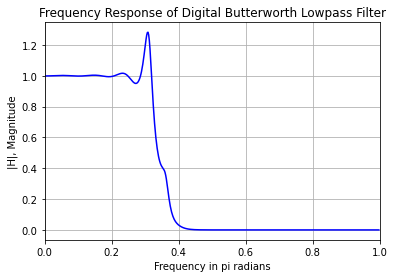

In [83]:
#주파수축에서 주파수영역의 크기응답 보기
Omega,H=signal.freqz(b,a)  #주파수축, 주파수응답
plt.plot(Omega/np.pi,abs(H),"blue"); plt.xlabel("Frequency in pi radians")
plt.title("Frequency Response of Digital Butterworth Lowpass Filter")
plt.ylabel("|H|, Magnitude"); plt.grid(); plt.xlim(0,1)

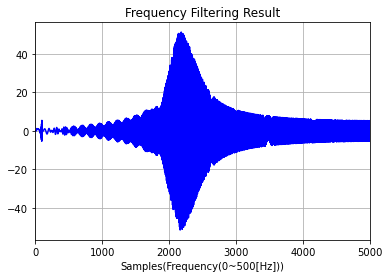

In [84]:
# 0.2초 만에 10Hz에서 500Hz까지 변하는 처프신호에 대한 주파수 선별 특성
Frequency_response_Signal_filtering(b,a)

### 체비세프-1

#### (1) 아날로그 필터 설계

In [85]:
# 체비세프-1 아날로그 필터 설계
print("\n","============= Filter order, Cutoff frequency ===================")
N,wc=signal.cheb1ord(wp,ws,Rp,As,analog=True)     #필터차수, 차단주파수
print("Filter order N=",N)
print("Cutoff frequency, wc=",wc,"=",wc/np.pi,"*pi")
print("\n","============= Analog Filter ====================================")
c,d=signal.cheby1(N,Rp,wc,"lowpass",analog=True)     #아날로그 시스템함수 계수
print("Numerator coefficients=",c); print("Denomunator coefficients=",d)


 ============= Filter order, Cutoff frequency ===================
Filter order N= 16
Cutoff frequency, wc= 1.7081613709269332 = 0.5437246515633 *pi

 ============= Analog Filter ====================================
Numerator coefficients= [0.45898622]
Denomunator coefficients= [  1.           1.93634693  13.54598079  21.9123854   74.13104857
  99.15062836 210.38782484 228.35925516 329.85545928 281.46559177
 280.37737082 177.91244107 116.9709306   49.51624856  18.60121077
   3.97892774   0.48618286]


#### 이선형변환을 사용하여 디지털필터 설계

In [86]:
# 이선형변환 사용, 디지털필터 설계
print("\n","========== Digital Filter(Direct Type) =========================")
b,a=signal.bilinear(c,d,Fs)     #이선형변환(s->z), 디지털 시스템함수 계수
print("Numerator coefficients=",b); print("Denomunator coefficients=",a)


 ========== Digital Filter(Direct Type) =========================
Numerator coefficients= [3.02772020e-07 4.84435232e-06 3.63326424e-05 1.69552331e-04
 5.51045077e-04 1.32250818e-03 2.42459834e-03 3.46371191e-03
 3.89667590e-03 3.46371191e-03 2.42459834e-03 1.32250818e-03
 5.51045077e-04 1.69552331e-04 3.63326424e-05 4.84435232e-06
 3.02772020e-07]
Denomunator coefficients= [ 1.00000000e+00 -7.21683114e+00  2.84751912e+01 -7.82983795e+01
  1.65091516e+02 -2.80055702e+02  3.92735697e+02 -4.62398457e+02
  4.60680222e+02 -3.89117685e+02  2.77655578e+02 -1.65757720e+02
  8.13380306e+01 -3.18342941e+01  9.42836256e+00 -1.90624658e+00
  2.01737346e-01]


#### (3) 0.2초 만에 10Hz에서 500Hz까지 변하는 처프신호에 대한 주파수 선별 특성을 구하고 그 결과를 그림으로 비교 

(0.0, 1.0)

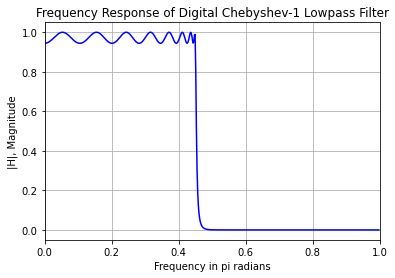

In [87]:
#주파수축에서 주파수영역의 크기응답 보기
Omega,H=signal.freqz(b,a)  #주파수축, 주파수응답
plt.plot(Omega/np.pi,abs(H),"blue"); plt.xlabel("Frequency in pi radians")
plt.title("Frequency Response of Digital Chebyshev-1 Lowpass Filter")
plt.ylabel("|H|, Magnitude"); plt.grid(); plt.xlim(0,1)

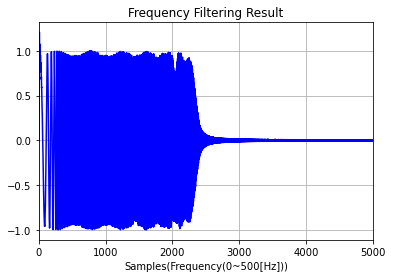

In [88]:
# 0.2초 만에 10Hz에서 500Hz까지 변하는 처프신호에 대한 주파수 선별 특성
Frequency_response_Signal_filtering(b,a)

### 체비세프-2

#### (1) 아날로그 필터 설계

In [89]:
# 체비세프-2 아날로그 필터 설계
print("\n","============= Filter order, Cutoff frequency ===================")
N,wc=signal.cheb2ord(wp,ws,Rp,As,analog=True)     #필터차수, 차단주파수
print("Filter order N=",N)
print("Cutoff frequency, wc=",wc,"=",wc/np.pi,"*pi")
print("\n","============= Analog Filter ====================================")
c,d=signal.cheby2(N,As,wc,"lowpass",analog=True)     #아날로그 시스템함수 계수
print("Numerator coefficients=",c); print("Denomunator coefficients=",d)


 ============= Filter order, Cutoff frequency ===================
Filter order N= 16
Cutoff frequency, wc= 1.9640908298956685 = 0.6251895285187172 *pi

 ============= Analog Filter ====================================
Numerator coefficients= [1.00000000e-03 0.00000000e+00 4.93779557e-01 0.00000000e+00
 4.00014318e+01 0.00000000e+00 1.23449308e+03 0.00000000e+00
 1.87088223e+04 0.00000000e+00 1.53967233e+05 0.00000000e+00
 7.01943420e+05 0.00000000e+00 1.66637169e+06 0.00000000e+00
 1.60707085e+06]
Denomunator coefficients= [1.00000000e+00 2.22726632e+01 2.48036257e+02 1.83222412e+03
 1.00476801e+04 4.33923274e+04 1.52817320e+05 4.48389430e+05
 1.11055011e+06 2.33669179e+06 4.18385396e+06 6.34130740e+06
 8.06258360e+06 8.38399775e+06 6.93862388e+06 4.11652348e+06
 1.60707085e+06]


#### 이선형변환을 사용하여 디지털필터 설계

In [90]:
# 이선형변환 사용, 디지털필터 설계
print("\n","========== Digital Filter(Direct Type) =========================")
b,a=signal.bilinear(c,d,Fs)     #이선형변환(s->z), 디지털 시스템함수 계수
print("Numerator coefficients=",b); print("Denomunator coefficients=",a)


 ========== Digital Filter(Direct Type) =========================
Numerator coefficients= [0.01951145 0.12529322 0.46889594 1.26039584 2.66254404 4.61908627
 6.75028726 8.43240896 9.07424629 8.43240896 6.75028726 4.61908627
 2.66254404 1.26039584 0.46889594 0.12529322 0.01951145]
Denomunator coefficients= [1.00000000e+00 1.59339596e+00 4.41210679e+00 5.80532462e+00
 8.41489261e+00 8.82427849e+00 8.76059644e+00 7.18765237e+00
 5.28361513e+00 3.32820327e+00 1.82412363e+00 8.49919548e-01
 3.31876268e-01 1.04950694e-01 2.54930554e-02 4.28266037e-03
 3.80697842e-04]


#### (3) 0.2초 만에 10Hz에서 500Hz까지 변하는 처프신호에 대한 주파수 선별 특성을 구하고 그 결과를 그림으로 비교 

(0.0, 1.0)

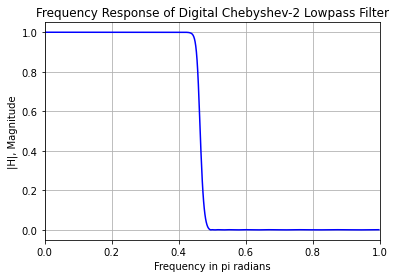

In [91]:
#주파수축에서 주파수영역의 크기응답 보기
Omega,H=signal.freqz(b,a)  #주파수축, 주파수응답
plt.plot(Omega/np.pi,abs(H),"blue"); plt.xlabel("Frequency in pi radians")
plt.title("Frequency Response of Digital Chebyshev-2 Lowpass Filter")
plt.ylabel("|H|, Magnitude"); plt.grid(); plt.xlim(0,1)

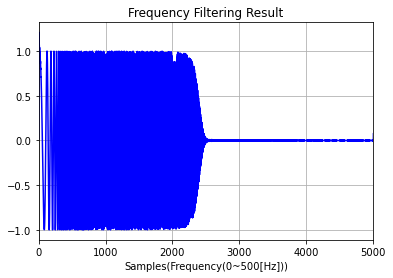

In [92]:
# 0.2초 만에 10Hz에서 500Hz까지 변하는 처프신호에 대한 주파수 선별 특성
Frequency_response_Signal_filtering(b,a)

### 엘립틱

#### (1) 아날로그 필터 설계

In [93]:
# 엘립틱 아날로그 필터 설계
print("\n","============= F\
ilter order, Cutoff frequency ===================")
N,wc=signal.ellipord(wp,ws,Rp,As,analog=True)     #필터차수, 차단주파수
print("Filter order N=",N)
print("Cutoff frequency, wc=",wc,"=",wc/np.pi,"*pi")
print("\n","============= Analog Filter ====================================")
c,d=signal.ellip(N,Rp,As,wc,"lowpass",analog=True) #아날로그 시스템함수 계수
print("Numerator coefficients=",c); print("Denomunator coefficients=",d)


 ============= Filter order, Cutoff frequency ===================
Filter order N= 8
Cutoff frequency, wc= 1.7081613709269332 = 0.5437246515633 *pi

 ============= Analog Filter ====================================
Numerator coefficients= [9.99556291e-04 0.00000000e+00 6.50834098e-02 0.00000000e+00
 8.55342699e-01 0.00000000e+00 3.99703711e+00 0.00000000e+00
 6.19515113e+00]
Denomunator coefficients= [ 1.          1.94074441  8.82655865 12.78264198 25.95087209 26.23613112
 27.73256792 16.0556008   6.56223692]


#### 이선형변환을 사용하여 디지털필터 설계

In [94]:
# 이선형변환 사용, 디지털필터 설계
print("\n","========== Digital Filter(Direct Type) =========================")
b,a=signal.bilinear(c,d,Fs)     #이선형변환(s->z), 디지털 시스템함수 계수
print("Numerator coefficients=",b); print("Denomunator coefficients=",a)


 ========== Digital Filter(Direct Type) =========================
Numerator coefficients= [0.0178823  0.04207837 0.09165335 0.1266308  0.14742161 0.1266308
 0.09165335 0.04207837 0.0178823 ]
Denomunator coefficients= [ 1.         -2.44445338  4.91938944 -6.20752307  6.26361509 -4.58011938
  2.53197312 -0.93882925  0.20156803]


#### (3) 0.2초 만에 10Hz에서 500Hz까지 변하는 처프신호에 대한 주파수 선별 특성을 구하고 그 결과를 그림으로 비교 

(0.0, 1.0)

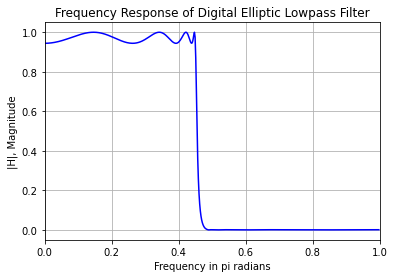

In [95]:
#주파수축에서 주파수영역의 크기응답 보기
Omega,H=signal.freqz(b,a)  #주파수축, 주파수응답
plt.plot(Omega/np.pi,abs(H),"blue"); plt.xlabel("Frequency in pi radians")
plt.title("Frequency Response of Digital Elliptic Lowpass Filter")
plt.ylabel("|H|, Magnitude"); plt.grid(); plt.xlim(0,1)

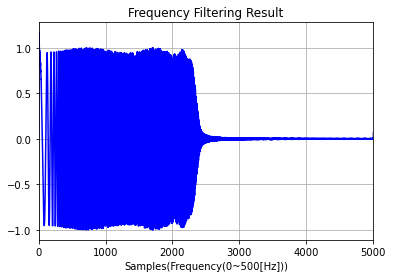

In [96]:
# 0.2초 만에 10Hz에서 500Hz까지 변하는 처프신호에 대한 주파수 선별 특성
Frequency_response_Signal_filtering(b,a)

## Problem 11

### (1) 체비세프-1 저역통과필터
* 통과대역 리플: Rp=1[dB], 통과대역 에지주파수: 0.2pi
* 저지대역 감쇄: As=15[dB], 저지대역 에지주파수: 0.3pi 

In [97]:
# 설계 사양
OmegaS=0.3*np.pi    #디지털 저지대역주파수 [rad]
OmegaP=0.2*np.pi    #디지털 통과대역주파수 [rad]
Rp=1     #통과대역 리플 [dB]
As=15     #저지대역 감쇠 [dB]

In [98]:
# 필터 설계
print("\n","========== Digital Filtr Order/ Cutoff Frequency ===============")
N,OmegaC=signal.cheb1ord(OmegaP/np.pi,OmegaS/np.pi,Rp,As) #필터차수, 차단주파수
print("Filter order, N=",N)
print("Cutoff frequency, OmegaC=",OmegaC,"*pi")

print("\n","=========== Digital Filter System Function ======================")
b,a=signal.cheby1(N,Rp,OmegaC,"lowpass") #시스템함수 분모/분자계수
print("Numerator coefficients=",b); print("Denominator coefficients=",a)


 ========== Digital Filtr Order/ Cutoff Frequency ===============
Filter order, N= 4
Cutoff frequency, OmegaC= 0.2 *pi

 =========== Digital Filter System Function ======================
Numerator coefficients= [0.00183555 0.0073422  0.0110133  0.0073422  0.00183555]
Denominator coefficients= [ 1.         -3.05433968  3.82899923 -2.29245173  0.55074452]


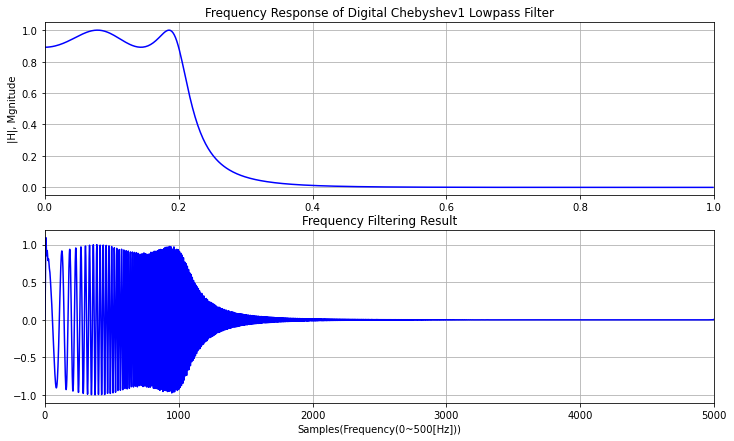

In [99]:
# 주파수영역 크기응답과 처프신호 필터링 결과 그래프 출력
Omega,H=signal.freqz(b,a) #주파수축에서 주파수영역 크기응답 보기

plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(Omega/np.pi,abs(H),"blue")
plt.title("Frequency Response of Digital Chebyshev1 Lowpass Filter")
plt.ylabel("|H|, Mgnitude"); plt.grid(); plt.xlim(0,1)
plt.subplot(2,1,2)
Frequency_response_Signal_filtering(b,a) #시간 축에서 신호필터링 결과 보기

### (2) 버터워스 고역통과 필터
* 통과대역 리플: Rp=1[dB], 통과대역 에지주파수: 0.2pi
* 저지대역 감쇄: As=15[dB], 저지대역 에지주파수: 0.3pi 

In [100]:
# 설계사양
OmegaP=0.3*np.pi    #디지털 저지대역주파수 [rad]
OmegaS=0.2*np.pi    #디지털 통과대역주파수 [rad]
Rp=1     #통과대역 리플 [dB]
As=15     #저지대역 감쇠 [dB]

In [101]:
# 필터 설계
print("\n","========== Digital Filtr Order/ Cutoff Frequency ===============")
N,OmegaC=signal.buttord(OmegaP/np.pi,OmegaS/np.pi,Rp,As) #필터차수, 차단주파수
print("Filter order, N=",N)
print("Cutoff frequency, OmegaC=",OmegaC,"*pi")

print("\n","=========== Digital Filter System Function ======================")
b,a=signal.butter(N,OmegaC,"highpass") #시스템함수 분모/분자계수
print("Numerator coefficients=",b); print("Denominator coefficients=",a)


 ========== Digital Filtr Order/ Cutoff Frequency ===============
Filter order, N= 6
Cutoff frequency, OmegaC= 0.27197876096485085 *pi

 =========== Digital Filter System Function ======================
Numerator coefficients= [ 0.17941114 -1.07646686  2.69116715 -3.58822287  2.69116715 -1.07646686
  0.17941114]
Denominator coefficients= [ 1.         -2.71505497  3.56147028 -2.67615307  1.19861435 -0.29882959
  0.03219091]


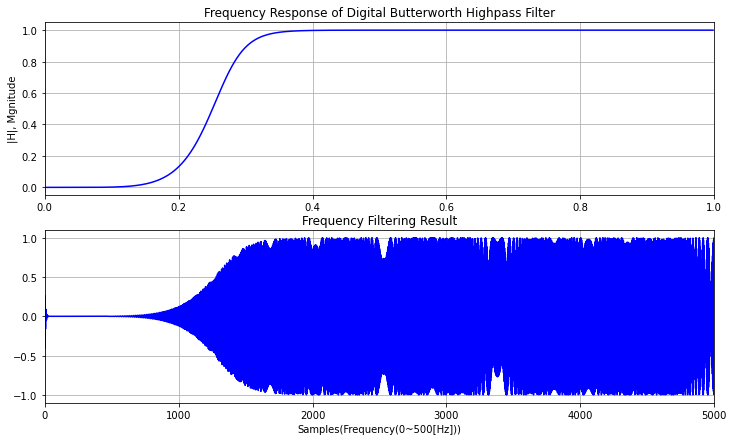

In [102]:
# 주파수영역 크기응답과 처프신호 필터링 결과 그래프 출력
Omega,H=signal.freqz(b,a) #주파수축에서 주파수영역 크기응답 보기

plt.figure(figsize=(12,7))
plt.subplot(2,1,1); plt.plot(Omega/np.pi,abs(H),"blue")
plt.title("Frequency Response of Digital Butterworth Highpass Filter")
plt.ylabel("|H|, Mgnitude"); plt.grid(); plt.xlim(0,1)
plt.subplot(2,1,2)
Frequency_response_Signal_filtering(b,a) #시간 축에서 신호필터링 결과 보기

### (3) 체비세프-2 대역통과필터
* 통과대역 리플: Rp=1[dB], 통과대역 에지주파수: [0.3pi, 0.75pi]
* 저지대역 감쇄: As=15[dB], 저지대역 에지주파수: [0.25pi,0.8pi] 

In [103]:
# 설계사양
OmegaS=[0.3*np.pi, 0.75*np.pi]    #디지털 저지대역주파수 [rad]
OmegaP=[0.4*np.pi, 0.6*np.pi]    #디지털 통과대역주파수 [rad]
Rp=1     #통과대역 리플 [dB]
As=15     #저지대역 감쇠 [dB]

In [104]:
# 필터 설계
OmegaS[0]=OmegaS[0]/np.pi; OmegaS[1]=OmegaS[1]/np.pi
OmegaP[0]=OmegaP[0]/np.pi; OmegaP[1]=OmegaP[1]/np.pi
print("\n","========== Digital Filtr Order/ Cutoff Frequency ===============")
N,OmegaC=signal.cheb2ord(OmegaP,OmegaS,Rp,As) #필터차수, 차단주파수
print("Filter order, N=",N)
print("Cutoff frequency, OmegaC=",OmegaC,"*pi")

print("\n","=========== Digital Filter System Function ======================")
b,a=signal.cheby2(N,As,OmegaS,"bandpass") #시스템함수 분모/분자계수
print("Numerator coefficients=",b); print("Denominator coefficients=",a)


 ========== Digital Filtr Order/ Cutoff Frequency ===============
Filter order, N= 3
Cutoff frequency, OmegaC= [0.34952391 0.65047609] *pi

 =========== Digital Filter System Function ======================
Numerator coefficients= [ 2.37770516e-01  4.97479999e-02 -2.26033328e-01 -7.91934903e-17
  2.26033328e-01 -4.97479999e-02 -2.37770516e-01]
Denominator coefficients= [1.         0.36744007 0.61045625 0.2233797  0.52744395 0.0561254
 0.01123557]


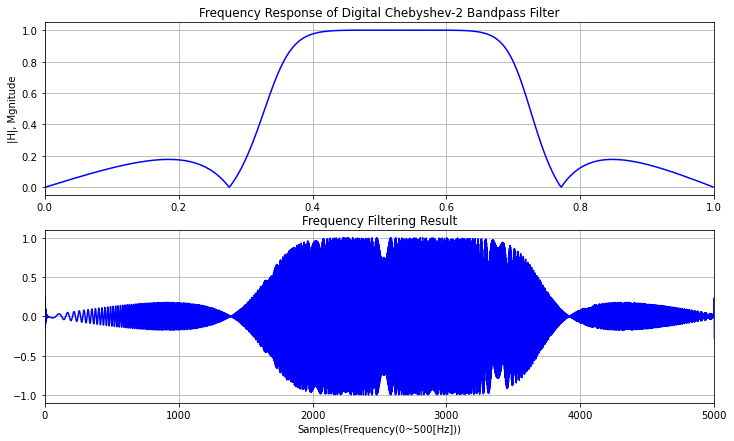

In [105]:
# 주파수영역 크기응답과 처프신호 필터링 결과 그래프 출력
Omega,H=signal.freqz(b,a) #주파수축에서 주파수영역 크기응답 보기

plt.figure(figsize=(12,7))
plt.subplot(2,1,1); plt.plot(Omega/np.pi,abs(H),"blue")
plt.title("Frequency Response of Digital Chebyshev-2 Bandpass Filter")
plt.ylabel("|H|, Mgnitude"); plt.grid(); plt.xlim(0,1)

plt.subplot(2,1,2)
Frequency_response_Signal_filtering(b,a) #시간 축에서 신호필터링 결과 보기

### (4) 엘립틱 대역저지 필터
* 통과대역 리플: Rp=1[dB], 통과대역 에지주파수: [0.4pi, 0.7pi]
* 저지대역 감쇄: As=15[dB], 저지대역 에지주파수: [0.25pi,0.8pi] 

In [106]:
#설계사양
OmegaS=[0.4*np.pi, 0.7*np.pi]    #디지털 저지대역주파수 [rad]
OmegaP=[0.25*np.pi, 0.8*np.pi]    #디지털 통과대역주파수 [rad]
Rp=1     #통과대역 리플 [dB]
As=15     #저지대역 감쇠 [dB]

In [107]:
# 필터 설계
OmegaS[0]=OmegaS[0]/np.pi; OmegaS[1]=OmegaS[1]/np.pi
OmegaP[0]=OmegaP[0]/np.pi; OmegaP[1]=OmegaP[1]/np.pi
print("\n","========== Digital Filtr Order/ Cutoff Frequency ===============")
N,OmegaC=signal.ellipord(OmegaP,OmegaS,Rp,As) #필터차수, 차단주파수
print("Filter order, N=",N)
print("Cutoff frequency, OmegaC=",OmegaC,"*pi")

print("\n","=========== Digital Filter System Function ======================")
b,a=signal.ellip(N,Rp,As,OmegaC,"bandstop") #시스템함수 분모/분자계수
print("Numerator coefficients=",b); print("Denominator coefficients=",a)


 ========== Digital Filtr Order/ Cutoff Frequency ===============
Filter order, N= 2
Cutoff frequency, OmegaC= [0.27620849 0.7999996 ] *pi

 =========== Digital Filter System Function ======================
Numerator coefficients= [0.37251233 0.21880582 0.53965044 0.21880582 0.37251233]
Denominator coefficients= [1.         0.35355882 0.05687955 0.13744951 0.38454963]


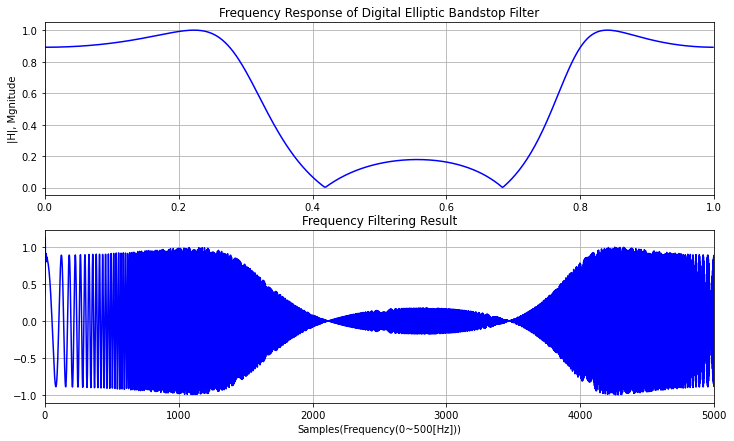

In [109]:
# 주파수영역 크기응답과 처프신호 필터링 결과 그래프 출력
Omega,H=signal.freqz(b,a) #주파수축에서 주파수영역 크기응답 보기

plt.figure(figsize=(12,7))
plt.subplot(2,1,1); plt.plot(Omega/np.pi,abs(H),"blue")
plt.title("Frequency Response of Digital Elliptic Bandstop Filter")
plt.ylabel("|H|, Mgnitude"); plt.grid(); plt.xlim(0,1)
plt.subplot(2,1,2)
Frequency_response_Signal_filtering(b,a) #시간 축에서 신호필터링 결과 보기